<a href="https://colab.research.google.com/github/ArslanUllahKhan1/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Email Campaign Effectiveness Prediction**
###**Problem Statement**
Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business.

###**Objective**
The objective of this project is to provide marketers who are regularly authoring email marketing campaigns with a thorough understanding of what we’re doing, so they too can leverage the machine learning models to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.



###**Data Description**
The data has the following features:

**Email_ID** — This column contains the email ids of individuals.

**Email_type** — Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or important email.

**Subject_Hotness_Score** — It is the email effectiveness score.

**Email_Source** — It represents the source of the email like sales or marketing or product type email.

**Email_Campaign_Type** — Campaign type

**Total_Past_Communications** — This column contains the previous mails from the same source.

**Customer_Location** — Categorical data which explains the different demographics of the customers.

**Time_Email_sent_Category** — It has 3 categories 1,2 and 3 which may give us morning,evening and night time slots.

**Word_Count** — It contains the no.of words contained in the mail.

**Total_Links** — Total links from the mail.

**Total_Images** — The banner images from the promotional email.

**Email_Status** — It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Reading the CSV file
email_df = pd.read_csv("/content/drive/MyDrive/Classification Data Sets/Copy of data_email_campaign.csv")

In [5]:
# Getting the shape of the data
email_df.shape

(68353, 12)

In [6]:
# Getting a glimpse of the data
email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [7]:
#Description of dataset 
email_df.describe(include='all')

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00081000034500,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


##**Exploratory Data Analysis**

In [8]:
#Getting info
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [9]:
#Checking Null values
email_df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64


We have 4 features that contains have null values.

Customer_Location is having 11595 null values

Total_Past_Communications is having 6825 null values

Total_Links is having 2201 null values

Total_Images is having 1677 null values


##Null Values Treatment

### Treating the Customer Location 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


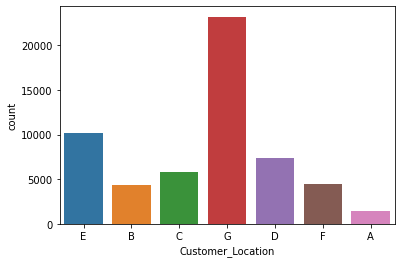

In [10]:
#Visualizing Customer_Location
sns.countplot(email_df['Customer_Location'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000.]), <a list of 9 Text major ticklabel objects>)

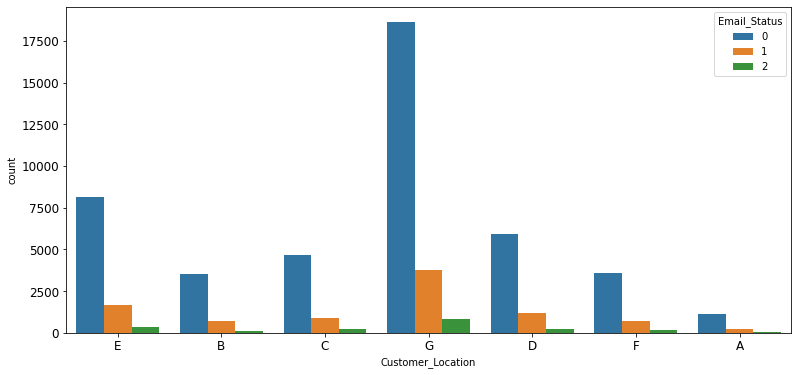

In [11]:
plt.figure(figsize=(13,6))
ax=sns.countplot(email_df['Customer_Location'],hue=email_df['Email_Status'])
plt.xticks(size=12)
plt.yticks(size=12)

As we can see irrespective of location the ratio of Email_Status is same throughout .So we can drop the location column

In [12]:
email_df.drop('Customer_Location',inplace=True,axis=1)
print('Shape of data after dropping ',email_df.shape)

Shape of data after dropping  (68353, 11)


###Now Total_Past_Communications

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


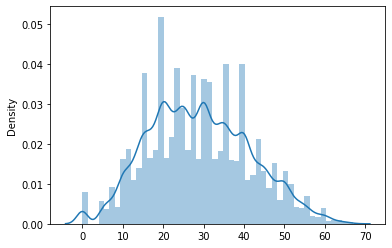

In [13]:
#let's see the distribution of Total Past Communications
sns.distplot(x=email_df['Total_Past_Communications'], hist = True)

####Since we have kind of normal distribution, we will use mean to fill up the null values in this column

In [14]:
#filling up the null values for Total_Past_Communications
email_df['Total_Past_Communications'].fillna(email_df['Total_Past_Communications'].mean(), inplace = True)

### Filling missing values of Total_Links column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


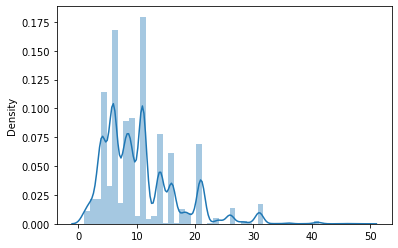

In [15]:
#let's see the distribution of Total Links
sns.distplot(x=email_df['Total_Links'], hist= True)

Total Links column distribution is skewed on the right. So we use mode to fill these null values.

In [16]:
#filling up the Total Links Column
email_df['Total_Links'].fillna(email_df['Total_Links'].mode()[0], inplace = True)

### Lastly Total_Images Column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


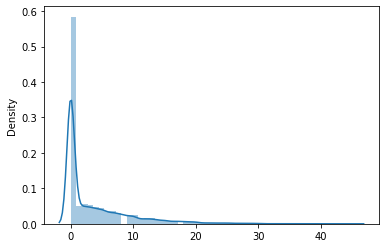

In [17]:
#let's see the distribution of Total Images
sns.distplot(x=email_df['Total_Images'], hist= True)

The number of images in most of the emails seems to be 0 or fewer than 3-4. It would be wise to fill the null values with mode values.

In [18]:
#filling up the Total Images Column
email_df['Total_Images'].fillna(email_df['Total_Images'].mode()[0], inplace = True)

In [19]:
#check for duplicates
email_df.duplicated().sum()

0

##Visualizations :

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Email Types bar plot')

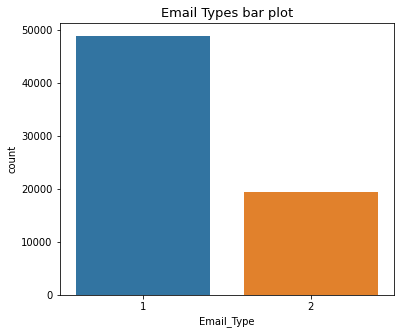

In [20]:
# Plotting bar plot for Email_Type
plt.figure(figsize=(6,5))
sns.countplot(email_df['Email_Type'])
plt.title('Email Types bar plot', fontsize=13)

**Inference** : Most of the emails were of type 1.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subject Hotness Score')

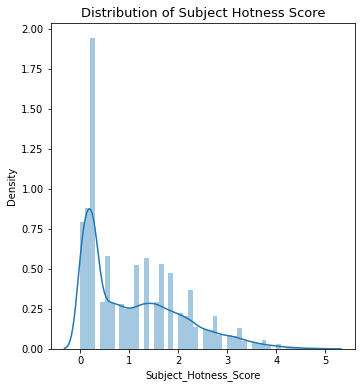

In [21]:
# Plotting histogram for Subject_Hotness_Score
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(email_df['Subject_Hotness_Score'])
plt.title('Distribution of Subject Hotness Score', fontsize=13)


Inference : Emails with lower subject hotness score are higher in numbers.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


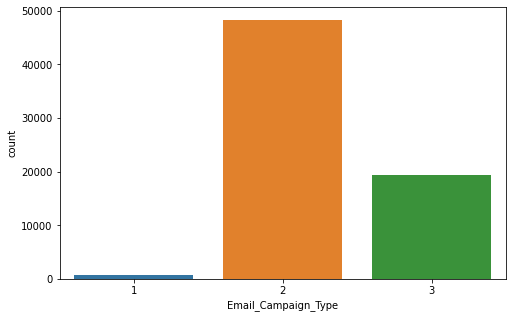

In [22]:
# Plotting bar plot for Email_Campaign_Type
plt.figure(figsize=(8,5))
sns.countplot(email_df['Email_Campaign_Type'])

Inference :2nd type campaign have higher number of mails as compared to other types.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Email Source Types bar plot')

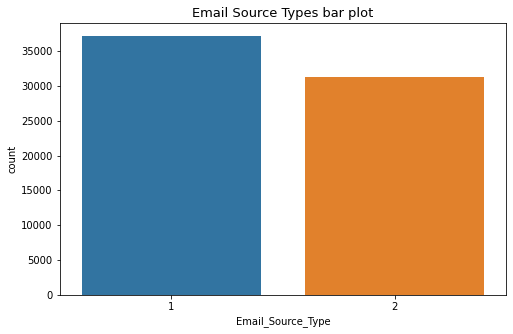

In [23]:
# Plotting bar plot for Email_Source_Type
plt.figure(figsize=(8,5))
sns.countplot(email_df['Email_Source_Type'])
plt.title('Email Source Types bar plot', fontsize=13)

Inference : Emails were sent from both the sources with almost equal probability.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Total Past Communications happened')

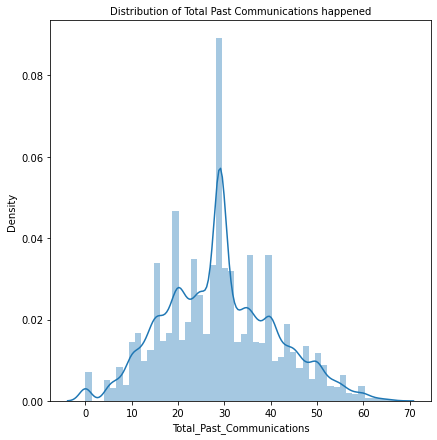

In [24]:
# Plotting histogram for Total_Past_Communications
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.distplot(email_df['Total_Past_Communications'])
plt.title('Distribution of Total Past Communications happened', fontsize=10)


Inference- Number of Total Past Communications is somehow normally distributed and average number of communications are around 30.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


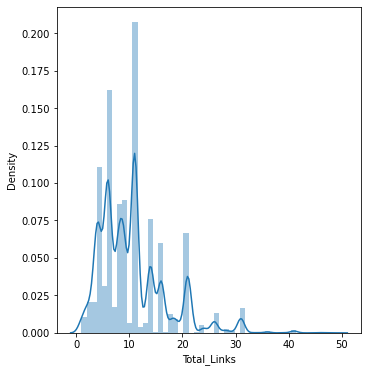

In [25]:
# Plotting histogram for Total_Links
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(email_df['Total_Links'])

In [26]:
#Checking average number of links in an email
print(f"Average number of links in an email : {email_df['Total_Links'].mean()}")

Average number of links in an email : 10.447895483738826


Inference-Total link numbers has no distinct distribution. Emails have mean number of links around 10

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


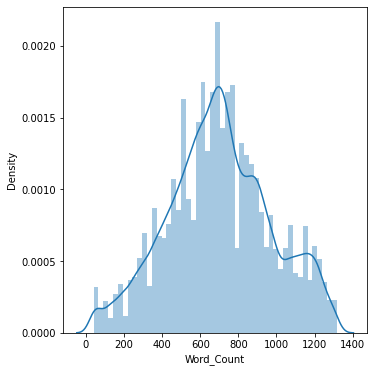

In [27]:
# Plotting histogram for Word_Count
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(email_df['Word_Count'])

Inference : As we can see email word counts is somehow normally distributed with average number of words around 700.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


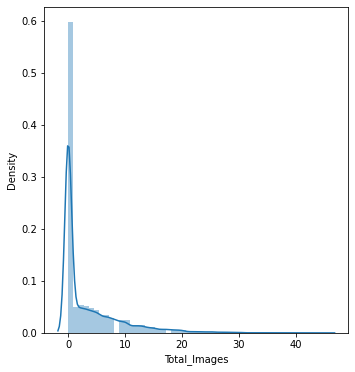

In [28]:
# Plotting histogram for Total_Images
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(email_df['Total_Images'])

Inference - Most of the mails have no photo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


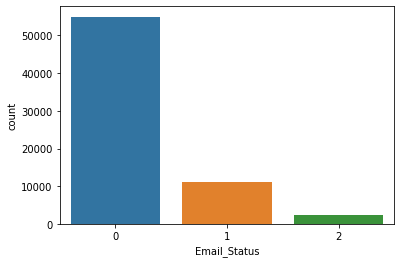

In [29]:
# Plotting histogram for Email Type
sns.countplot(email_df['Email_Status'])

Inference- Very few number of customer are acknowledging the mails. Some customers are also reading the mails which is good for campaign.

([<matplotlib.patches.Wedge at 0x7f8c75b053d0>,
 [Text(-0.8975404408883408, 0.6359411584179488, '0'),
  Text(0.8978020017290247, -0.7962107545690126, '1'),
  Text(1.19286980973148, -0.13062012490877054, '2')],
 [Text(-0.48956751321182224, 0.34687699550069934, '80.38%'),
  Text(0.523717834341931, -0.46445627349859064, '16.15%'),
  Text(0.6958407223433632, -0.07619507286344948, '3.47%')])

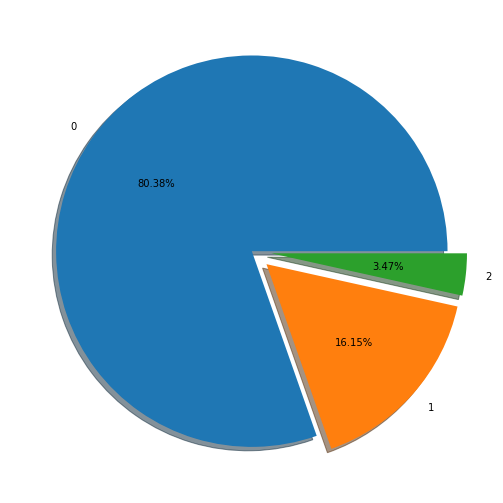

In [30]:
# Plotting a pie chart for Email_Status
plt.figure(figsize = (12,9))
plt.pie(email_df['Email_Status'].value_counts(), labels = [0,1,2], explode = [0,0.1,0.1], autopct='%1.2f%%', shadow = True)

We have multiclass dependent variable and from pie chart we can see status has 80.4% data so we can conclude our data is imbalanced.


###Unique Values

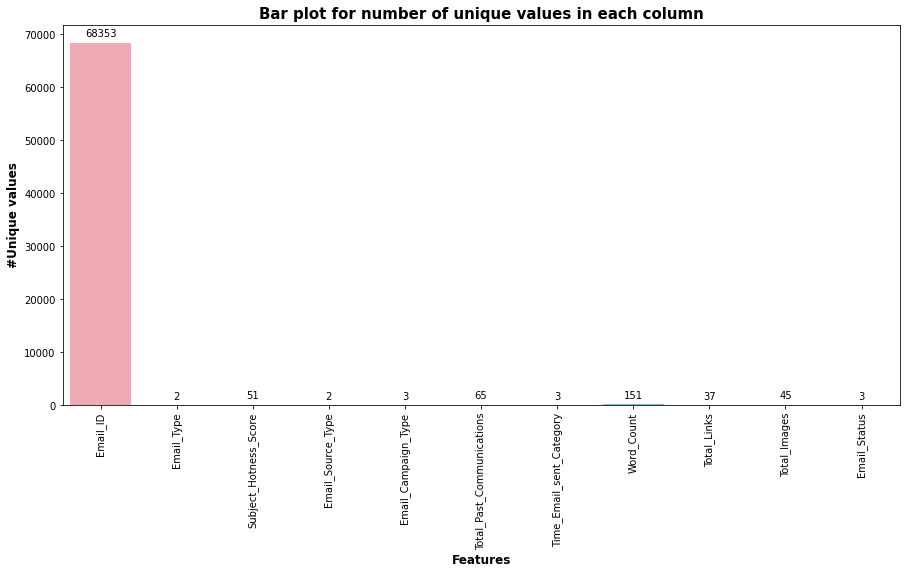

In [31]:
#Plotting unique values in each feature
unique_df = pd.DataFrame()
unique_df['Features'] = email_df.columns
unique=[]
for i in email_df.columns:
    unique.append(email_df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

###**Handling Outliers**

In [32]:
#Extracting the numerical features
numerical_columns=list(email_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [33]:
#Extracting the discrete variables from feature
discrete = []
for var in numerical_features:
    if len(email_df[var].unique())<20:
        print(var, ' values: ', email_df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

Email_Type  values:  [1 2]
Email_Source_Type  values:  [2 1]
Email_Campaign_Type  values:  [2 3 1]
Time_Email_sent_Category  values:  [1 2 3]
Email_Status  values:  [0 1 2]
There are 5 discrete variables


In [34]:
#Extracting the continous variables from features
continuous = [var for var in numerical_features if var not in discrete and var not in ['Id']]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


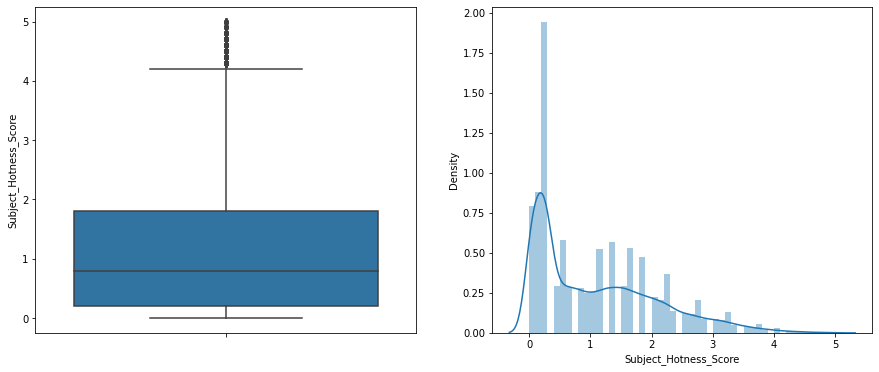

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


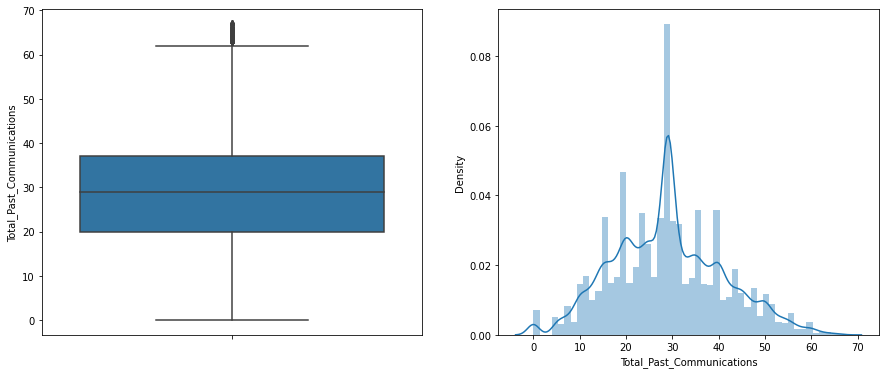

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


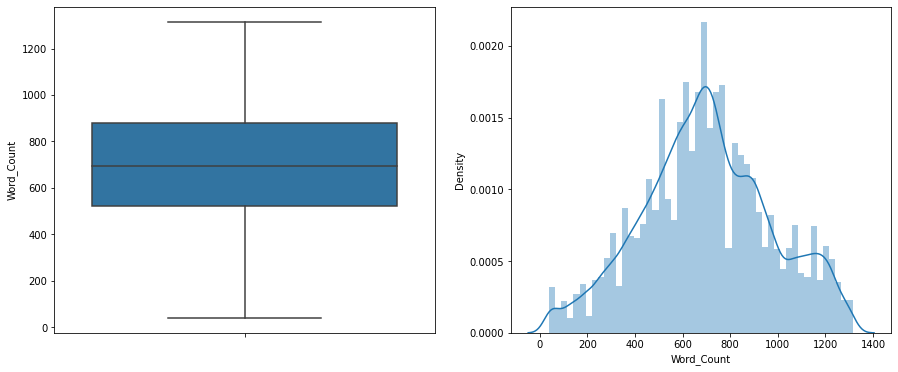

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


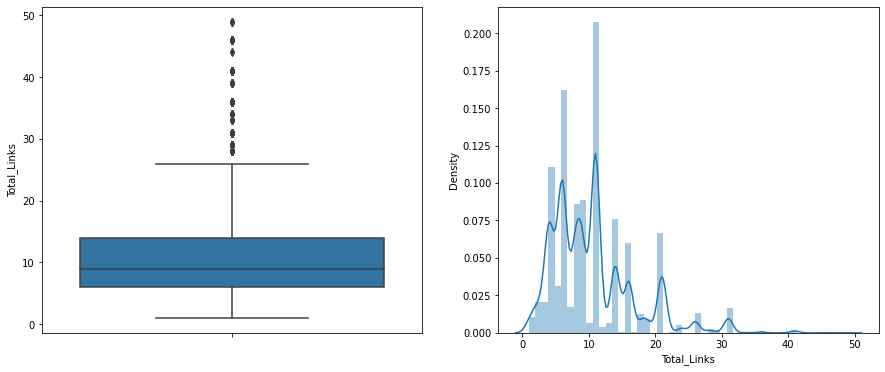

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


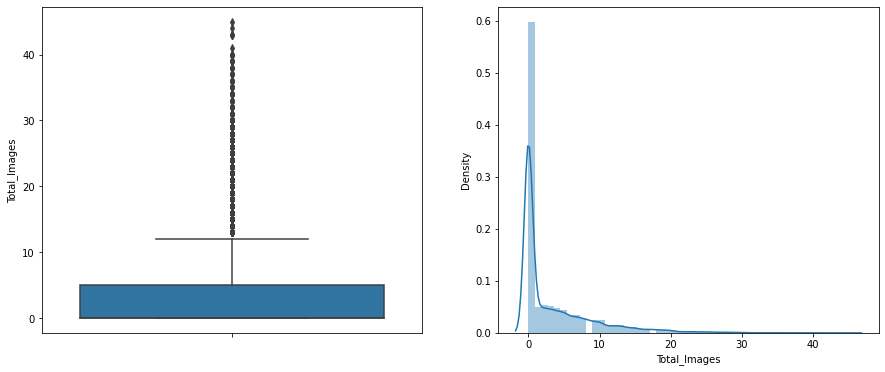

In [35]:
#plotting the outliers boxplot and spread of variance in features
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=email_df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(email_df[var].dropna())
    fig.set_xlabel(var)

    plt.show()

###From the above plots we can say that we have some outliers.


1.   Subject Hotness Score
2.   Past communications

1.   Total Image
2.   Total Link





In [36]:
#Creating the temporary dataframe
temparary_df = email_df[['Email_Status','Subject_Hotness_Score','Total_Links','Total_Images','Total_Past_Communications']]

In [37]:
temparary_df['Email_Status'] = temparary_df.loc[temparary_df.index, 'Email_Status'].copy()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


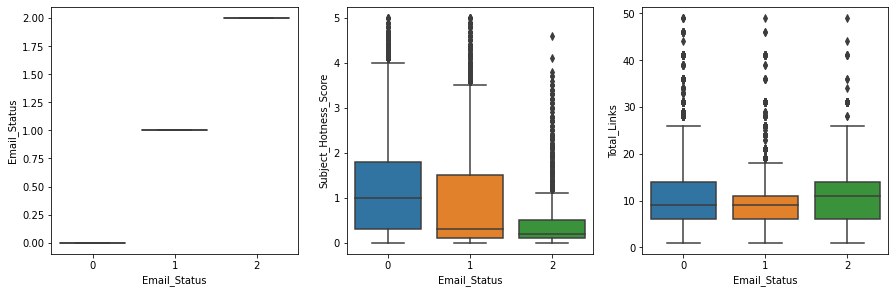

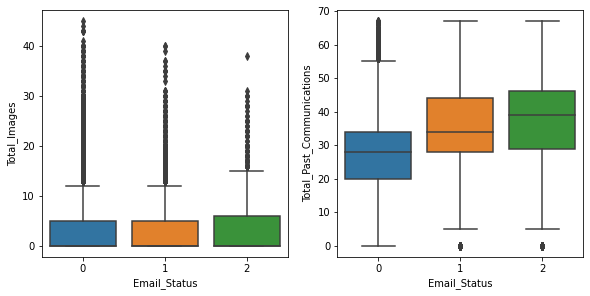

In [38]:
#plotiing outliers of features present w.r.t the status feature
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(temparary_df.columns):
    if ix <= 3:
        if c != 'status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data=temparary_df, x='Email_Status', y=c, ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

We plot the number of outliers with respect to the individual classes of our target variable.As we know our dataset imbalanced so removing outliers will affect on minority class so we will keep the outliers and we will use machine learning models which are robust to outliers.


##**Categorical Encoding**

In [39]:
#creating dummies for categorical variables
category_col=['Email_Type','Email_Source_Type','Email_Campaign_Type']
new_dataframe=pd.get_dummies(email_df, columns=category_col)
new_dataframe.drop('Email_Type_2',axis=1,inplace=True) #Since they have binary category
new_dataframe.drop('Email_Source_Type_2',axis=1,inplace=True)

In [40]:
new_dataframe.head()

,Email_ID,Subject_Hotness_Score,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3
0,EMA00081000034500,2.2,33.0,1,440,8.0,0.0,0,1,0,0,1,0
1,EMA00081000045360,2.1,15.0,2,504,5.0,0.0,0,0,1,0,1,0
2,EMA00081000066290,0.1,36.0,2,962,5.0,0.0,1,0,1,0,0,1
3,EMA00081000076560,3.0,25.0,2,610,16.0,0.0,0,1,0,0,1,0
4,EMA00081000109720,0.0,18.0,2,947,4.0,0.0,0,1,0,0,0,1


In [41]:
#Pushing Email_Status at last of the DataFrame
list_of_column=list(new_dataframe.columns)
list_of_column.remove('Email_Status')
list_of_column.append('Email_Status')
list_of_column
new_dataframe=new_dataframe[list_of_column]
new_dataframe.head()

,Email_ID,Subject_Hotness_Score,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Email_Status
0,EMA00081000034500,2.2,33.0,1,440,8.0,0.0,1,0,0,1,0,0
1,EMA00081000045360,2.1,15.0,2,504,5.0,0.0,0,1,0,1,0,0
2,EMA00081000066290,0.1,36.0,2,962,5.0,0.0,0,1,0,0,1,1
3,EMA00081000076560,3.0,25.0,2,610,16.0,0.0,1,0,0,1,0,0
4,EMA00081000109720,0.0,18.0,2,947,4.0,0.0,1,0,0,0,1,0


###**Data Transformation**

In [42]:
#Seprating the numerical columns
numerical_columns = new_dataframe[['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Images']]

In [43]:
#Now applying standardization formula
for column in numerical_columns:
  new_dataframe[column] = ((new_dataframe[column] - new_dataframe[column].mean()) / (new_dataframe[column].std()))

###**Checking Correlation**

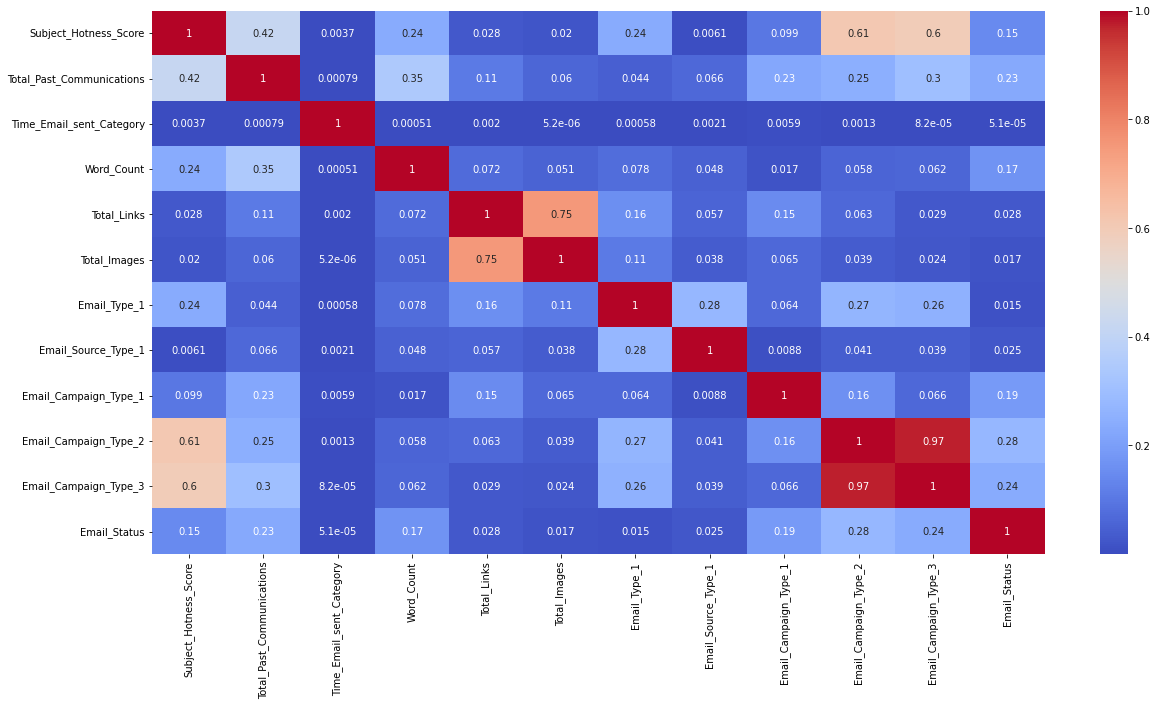

In [44]:
## Correlation
plt.figure(figsize=(20,10))
correlation=new_dataframe.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

From above correlation plot we can conclude that :-


1.   Campaign type and score has high correlation
2.   Images and total links have high correlation

1.   Past communication and score has high correlation





In [45]:
# Dealing with Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [46]:
calc_vif(new_dataframe[[i for i in new_dataframe.describe().columns if i not in ['id','location','email_type','source_type','campaign_type','category','total_links','images','status','source_type_1']]])


,variables,VIF
0,Subject_Hotness_Score,2.426475
1,Total_Past_Communications,2.037156
2,Time_Email_sent_Category,1.000145
3,Word_Count,1.548379
4,Total_Links,2.428232
5,Total_Images,2.323690
6,Email_Type_1,1.270041
7,Email_Source_Type_1,1.120106
8,Email_Campaign_Type_1,1.460299
9,Email_Campaign_Type_2,17.311347


In [47]:
# Data for all the independent variables
X = new_dataframe.drop(labels=['Email_Status','Email_ID'],axis=1)

# Data for the dependent variable
y = new_dataframe['Email_Status']

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# define SelectFromModel feature selection method
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=40), max_features=10,threshold=0.04)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
#Important features list
embeded_rf_feature

6 selected features


['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images']

In [49]:
#Creating the final datadrame for modelling
final_dataframe=new_dataframe[['Subject_Hotness_Score','Total_Past_Communications','Time_Email_sent_Category','Word_Count','Total_Links','Total_Images','Email_Status']]

In [50]:
final_dataframe.head()

,Subject_Hotness_Score,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1.107201,0.341911,1,-0.956618,8.0,-0.62349,0
1,1.006958,-1.171435,2,-0.721081,5.0,-0.62349,0
2,-0.997898,0.594136,2,0.964481,5.0,-0.62349,1
3,1.909143,-0.330687,2,-0.330973,16.0,-0.62349,0
4,-1.098141,-0.919211,2,0.909277,4.0,-0.62349,0


###**Handling the imbalanced data**

In [51]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(final_dataframe.iloc[:,1:-1], final_dataframe['Email_Status'])

print('Original dataset shape', len(final_dataframe))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 68353
Resampled dataset shape 164823


Text(0.5, 1.0, 'Before SMOTE')

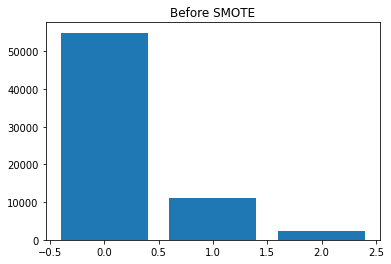

In [52]:
plt.bar(Counter(final_dataframe['Email_Status']).keys(), Counter(final_dataframe['Email_Status']).values())
plt.title("Before SMOTE")

Text(0.5, 1.0, 'After SMOTE')

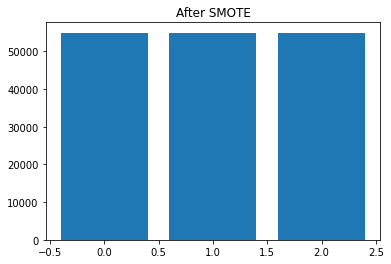

In [53]:
plt.bar(Counter(y_smote).keys(), Counter(y_smote).values())
plt.title("After SMOTE")

###Spliting the dataset into Train-Test

In [54]:
from sklearn.model_selection import train_test_split
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3,stratify= y_smote)


##**Model Building**

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# To supress the warning messages generated
import warnings
warnings.filterwarnings('ignore')

In [57]:
#Creating dataframe for storing model evaluated metrics.
column_name=['MODEL_NAME','F1_SCORE_Train','PRECISION_Train','RECALL__Train','ACCURACY_Train','ROC_AUC_Train','F1_SCORE_Test','PRECISION_Test','RECALL__Test','ACCURACY_Test','ROC_AUC_Test']
All_model_Performance=pd.DataFrame(columns=column_name)

In [58]:
def evaluate(model,X_train,y_train,X_test,y_test,model_name):
  '''Function for evaluating all the models'''
  global column_name
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)

  # To get the probabilities on train and test
  train_preds = model.predict_proba(X_train)
  test_preds = model.predict_proba(X_test)

  # To Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  # To get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )

  # To get the Recall for train and test
  train_recall = recall_score(y_train, train_class_preds, average='weighted')
  test_recall = recall_score(y_test, test_class_preds, average='weighted')

  # To get the precision for train and test
  train_precision = precision_score(y_train, train_class_preds, average='weighted')
  test_precision = precision_score(y_test, test_class_preds, average='weighted')

  # To get the f1 Score for train and test
  train_f1score = f1_score(y_train, train_class_preds, average='weighted')
  test_f1score = f1_score(y_test, test_class_preds, average='weighted')

  # to get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')

  list_score=[model_name,train_f1score,train_precision,train_recall,train_accuracy,train_auc,test_f1score,test_precision,test_recall,test_accuracy,test_auc]
  xyz = {column_name[i]: list_score[i] for i in range(len(column_name))}
  

  print("----- Evaluation on train data -----\n")
  print("Confusion matrix \n")
  print(train_cm)
  print("\n Accuracy = ",train_accuracy)
  print("\n Recall = ",train_recall)
  print("\n Precision = ",train_precision)
  print("\n F1 score = ",train_f1score)
  print("\n Roc_Auc score = ",train_auc)

  print("\n\n----- Evaluation on test data -----\n")
  print("Confusion matrix \n")
  print(test_cm)
  print("\n Accuracy = ",test_accuracy)
  print("\n Recall = ",test_recall)
  print("\n Precision = ",test_precision)
  print("\n F1 score = ",test_f1score)
  print("\n Roc_Auc score = ",test_auc)

  fpr = {}
  tpr = {}
  thresh ={}
  n_class=3
  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='Green', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='Red', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='Blue', label='Class 2 vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend()
  return xyz

In [59]:
final_list=[]

###**Decision Tree Model**

In [60]:
# Initializing the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

In [61]:
# Fitting onto the train set
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

----- Evaluation on train data -----

Confusion matrix 

[[43732   199    22]
 [ 1131 42744    78]
 [  227   138 43587]]

 Accuracy =  0.9863868707245673

 Recall =  0.9863868707245673

 Precision =  0.9865902399626082

 F1 score =  0.9863992586273668

 Roc_Auc score =  0.9997619912107357


----- Evaluation on test data -----

Confusion matrix 

[[8797 1760  431]
 [1696 7331 1961]
 [ 442 1889 8658]]

 Accuracy =  0.7518883664492644

 Recall =  0.7518883664492644

 Precision =  0.7518939344174743

 F1 score =  0.7518875509746202

 Roc_Auc score =  0.8166101449654396


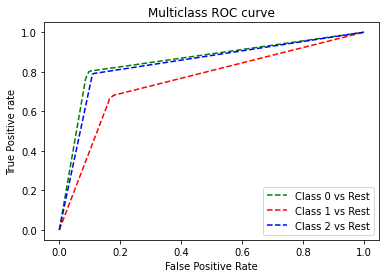

In [62]:
# Evaluation of our decision tree model
xyz=evaluate(dt_classifier,X_train,y_train,X_test,y_test,'Decision_Tree')
final_list.append(xyz)

We can observe that model is overfitting since it's performing really well on training set but not that good on unseen data.

###**XGBoost**

In [63]:
xgb_model = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)

In [64]:
# Fit the model
xgb_model.fit(X_train,y_train)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

----- Evaluation on train data -----

Confusion matrix 

[[41528  2055   370]
 [ 6284 31829  5840]
 [ 1494  1823 40635]]

 Accuracy =  0.8645057561922674

 Recall =  0.8645057561922674

 Precision =  0.8670264765333119

 F1 score =  0.8615963796984264

 Roc_Auc score =  0.9658889437707406


----- Evaluation on test data -----

Confusion matrix 

[[9978  844  166]
 [1860 6664 2464]
 [ 449 1121 9419]]

 Accuracy =  0.7905657515546792

 Recall =  0.7905657515546792

 Precision =  0.7886937728501991

 F1 score =  0.7848356193155014

 Roc_Auc score =  0.9211997317909372


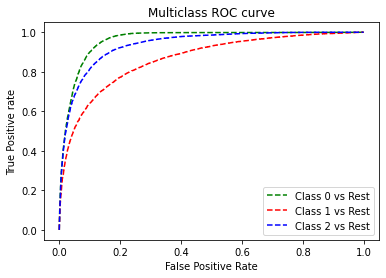

In [65]:
# Evaluate the results
xyz=evaluate(xgb_model,X_train,y_train,X_test,y_test,'XGBoost')
final_list.append(xyz)

##**KNN Classifier**

In [66]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [67]:
# Fit the model on the train set
classifier_knn.fit(X_train,y_train)

KNeighborsClassifier()

----- Evaluation on train data -----

Confusion matrix 

[[31572  8361  4020]
 [ 3604 37776  2573]
 [ 1772  2481 39699]]

 Accuracy =  0.8270032914195574

 Recall =  0.8270032914195574

 Precision =  0.8296905789055516

 F1 score =  0.8254916422811741

 Roc_Auc score =  0.9568484989915822


----- Evaluation on test data -----

Confusion matrix 

[[6686 2869 1433]
 [1517 8434 1037]
 [ 670 1023 9296]]

 Accuracy =  0.740664340967693

 Recall =  0.740664340967693

 Precision =  0.7426146725119058

 F1 score =  0.7379504853300493

 Roc_Auc score =  0.8838095158297653


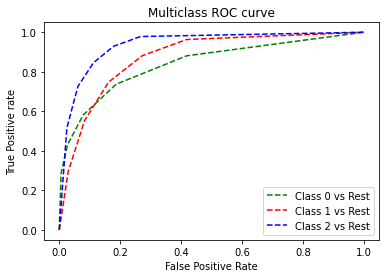

In [68]:
# Evaluate the model
xyz=evaluate(classifier_knn,X_train,y_train,X_test,y_test,'KNN')
final_list.append(xyz)

In [69]:
# In case of classifier like knn the parameter is to be tuned
param_grid = {'n_neighbors':np.arange(1,5)}

In [70]:
# Performing RandomSearch
knn = KNeighborsClassifier()
knn_cv= RandomizedSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([1, 2, 3, 4])})

----- Evaluation on train data -----

Confusion matrix 

[[43034   764   155]
 [  770 43052   131]
 [  138   136 43678]]

 Accuracy =  0.9841192798313337

 Recall =  0.9841192798313337

 Precision =  0.9841179927449555

 F1 score =  0.9841186249630408

 Roc_Auc score =  0.9880894875666332


----- Evaluation on test data -----

Confusion matrix 

[[7599 2308 1081]
 [1652 8494  842]
 [ 679  792 9518]]

 Accuracy =  0.7769149097527681

 Recall =  0.7769149097527681

 Precision =  0.7766008132207286

 F1 score =  0.7758410998396835

 Roc_Auc score =  0.8326850112566656


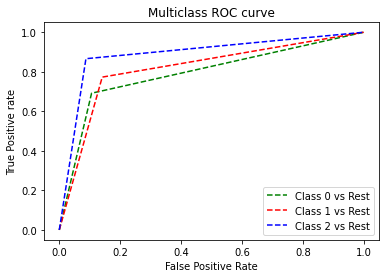

In [71]:
# Evaluate results
xyz=evaluate(knn_cv,X_train,y_train,X_test,y_test,'Hyper_Tuned_KNN')
final_list.append(xyz)

##**Random Forest**

In [72]:
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest Classification to the Training set
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 35)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=35)

----- Evaluation on train data -----

Confusion matrix 

[[43107   718   128]
 [ 1216 42467   270]
 [  245   414 43293]]

 Accuracy =  0.9773165071516328

 Recall =  0.9773165071516328

 Precision =  0.9773816663427123

 F1 score =  0.977325208810735

 Roc_Auc score =  0.9984351808333835


----- Evaluation on test data -----

Confusion matrix 

[[9274 1354  360]
 [1799 7878 1311]
 [ 515 1273 9201]]

 Accuracy =  0.7994236311239193

 Recall =  0.7994236311239193

 Precision =  0.7988486728591798

 F1 score =  0.7988110849732681

 Roc_Auc score =  0.9198880688858754


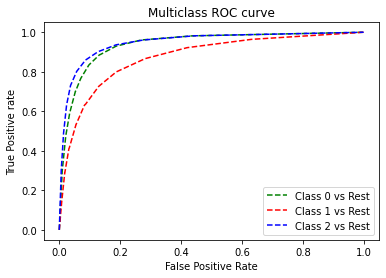

In [73]:
# Evaluate results
xyz=evaluate(classifier_rf,X_train,y_train,X_test,y_test,'Random_Forest')
final_list.append(xyz)

##**Logistic Regression**

In [74]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Fit on the train set
log_reg.fit(X_train,y_train)

LogisticRegression()

----- Evaluation on train data -----

Confusion matrix 

[[27379  8563  8011]
 [14718 12733 16502]
 [12885  8501 22566]]

 Accuracy =  0.47534468898360355

 Recall =  0.47534468898360355

 Precision =  0.4682032019684714

 F1 score =  0.46485421467891075

 Roc_Auc score =  0.6512011868726763


----- Evaluation on test data -----

Confusion matrix 

[[6894 2057 2037]
 [3761 3141 4086]
 [3272 2077 5640]]

 Accuracy =  0.4755043227665706

 Recall =  0.4755043227665706

 Precision =  0.46874425663026276

 F1 score =  0.4643863895235719

 Roc_Auc score =  0.6500491443180973


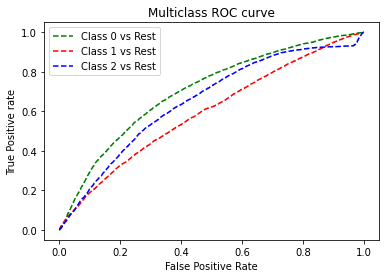

In [75]:
# Evaluate the results
xyz=evaluate(log_reg,X_train,y_train,X_test,y_test,'Logistic_Regression')
final_list.append(xyz)

In [76]:
All_model_Performance=pd.DataFrame(final_list)

In [77]:
All_model_Performance

,MODEL_NAME,F1_SCORE_Train,PRECISION_Train,RECALL__Train,ACCURACY_Train,ROC_AUC_Train,F1_SCORE_Test,PRECISION_Test,RECALL__Test,ACCURACY_Test,ROC_AUC_Test
0,Decision_Tree,0.986399,0.986590,0.986387,0.986387,0.999762,0.751888,0.751894,0.751888,0.751888,0.816610
1,XGBoost,0.861596,0.867026,0.864506,0.864506,0.965889,0.784836,0.788694,0.790566,0.790566,0.921200
2,KNN,0.825492,0.829691,0.827003,0.827003,0.956848,0.737950,0.742615,0.740664,0.740664,0.883810
3,Hyper_Tuned_KNN,0.984119,0.984118,0.984119,0.984119,0.988089,0.775841,0.776601,0.776915,0.776915,0.832685
4,Random_Forest,0.977325,0.977382,0.977317,0.977317,0.998435,0.798811,0.798849,0.799424,0.799424,0.919888
5,Logistic_Regression,0.464854,0.468203,0.475345,0.475345,0.651201,0.464386,0.468744,0.475504,0.475504,0.650049


##**Conclusion**:

1.	We observe that he category 2, email-type 1 & campaign type-2 was high in number.

2.	For modelling, it was observed that for imbalance handling Oversampling i.e. SMOTE worked better in balancing the data.

3.	Email word counts is  somehow normally distributedwith mean of words around 700.

4.	Time_Email_Sent and Customer_Location were insignificant in determining the Email_status. The ratio of the Email_Status was the same irrespective of the demographic location or the time frame the emails were sent on.

5.	As we had imbalanced data; the status with value 0 comprises 80% of data. So we used SMOTE method to deal with this imbalanced data.

6.	Based on the metrics, Random Forest worked the best, giving a train score of 97% and test score of 81% for F1 score.
